# Description
Add to the queueing simulator you have already developed (lab 1) some routines to:

a) detect the end of transient in an automated way (write a short report to describe the algorithm you have employed)

b) evaluate the accuracy of results.

Your code should employ a "batch means" technique that adaptively chooses  the number of batches so to achieve outputs with a desired degree of accuracy. 

Define properly the accuracy metric, which should be related to the width of confidence intervals.

Plot of the average delay in function of the utilisation, where the utilisation is: 0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99. Show also the 95%-level confidence intervals.

Consider three scenarios for the service time:

EXP: exponentially distributed with mean=1

DET: deterministic =1

HYP:  distributed according to a hyper-exponential distribution with mean=1 standard deviation=10

In [470]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import random
import numpy as np

# Defining functions and classes

In [471]:
def arrival(time, FES, queue, average_arrival_time, average_service_time):
    
    global users
    global customer
    
    # introducing random client arrival
    # inter_arrival = np.random.exponential(1.0/average_arrival_time)
    
    # if distribution == 'deterministic':
    #     average_service_time = 1
    #     average_arrival_time = average_service_time/u
    # elif distribution == 'exponential':
    #     average_service_time = random.expovariate(1)
    #     # average_arrival_time = 1/u
    #     average_arrival_time = average_service_time/u
    # else:
    #     average_service_time = hyper_expo()
    #     # average_arrival_time = 1/u
    #     average_arrival_time = average_service_time/u
            
    
    
    
    # inter_arrival = random.expovariate(1.0/average_arrival_time)
    inter_arrival = np.random.exponential(average_arrival_time)
    
    
    #FES.put((time + inter_arrival, 'arrival'))
    FES.append((time + inter_arrival, 'arrival'))
    
    # managing the event 
    users += 1
    x = 'client' + str(customer)
    customer += 1
    
    # recording client id and put it in the list
    client = Client(x, time)
    queue.append(client)

    print(f'{client.name} arrived at {client.arrival_time}')
    
    # start the service in case the server is idle
    if users == 1:
        # scheduling random departure time to the clients
        # service_time = np.random.exponential(1.0/average_service_time)
        # service_time = random.expovariate(1.0/average_service_time)
        service_time = average_service_time
        FES.append((time + service_time, 'departure'))


def departure(time, FES, queue, average_arrival_time, average_service_time):
    
    global users
    
    # manipulating the list of clients to get FIFO orientation
    queue.reverse()
    client = queue.pop()
    queue.reverse()
    users -= 1
    delay = time - client.arrival_time
    
    print(f'{client.name} departured at {time}')
    
    # checking the number of clients in line
    if users > 0:
        # scheduling random departure time to the clients
        # service_time = np.random.exponential(1.0/average_service_time)
        # service_time = random.expovariate(1.0/average_service_time)
        service_time = average_service_time
        FES.append((time + service_time, 'departure'))
    
    return delay

class Client:
    def __init__(self, name, arrival_time):
        self.name = name
        self.arrival_time = arrival_time
        

# Finding transient knee (k)
In order to find the transient knee (k), we should implement the simulation for a long time and compute the average. Afterwards, we should calculate the average depending on k to plot. Fianlly, k is determined by this plot.

In [472]:
# def transient_point(variance_list):
    
#     var_ave = np.mean(variance_list)
#     var_std = np.std(variance_list)
#     print(var_ave, var_std)
#     var_max = max(variance_list)
#     j = variance_list.index(var_max)
    
#     for i in range(j, len(variance_list)):
#         if (variance_list[i] > var_ave - var_std/2) and (variance_list[i] < var_ave + var_std/2):
#             return i


def transient_point(cumulative_delay, u):
    
    ave = np.mean(cumulative_delay)
    std = np.std(cumulative_delay)
    
    if u <= 0.7:
        j = int(len(cumulative_delay) * u)
    else:
        j = int(len(cumulative_delay) * 0.7)
    
    for i in range(j, len(cumulative_delay)):
        if (cumulative_delay[i] > ave - std) and (cumulative_delay[i] < ave + std):
            return i



def confidence_interval_margin(batch_mean_list, confidence_interval):
    
    mu = np.mean(batch_mean_list)
    std = np.std(batch_mean_list)
    n = len(batch_mean_list)
    t = np.abs(ss.t.ppf((1-confidence_interval)/2, n - 1))
    
    margin = t * std / np.sqrt(n)
    
    expanding_condition = 2 * margin / mu
    
    return mu, margin, expanding_condition


import math
def hyper_expo() -> float:
    # """
    # This function generate an hyperexponential time according the definition of the hyperexponential itself.
    # Distribution's parameters found by solving the corresponding linear system for target mean and std.
    # More on that in the report.
    # """
    # p = .5
    # l1 = 1/1.5
    # l2 = 1/1.1
    # u = random.random()
    # v = random.random()
    # if u <= p:
    #     service = -1.5 * math.log(1 - v)
    # else:
    #     service = -1.1 * math.log(1 - v)

    # return service
    
    
    
    
    
    """
    This function generate an hyperexponential time according the definition of the hyperexponential itself.
    Distribution's parameters found by solving the corresponding linear system for target mean and std.
    More on that in the report.
    """
    p = .5
    l1 = 1/6
    l2 = 1/8
    u = random.random()
    if u <= p:
        expec = l1
    else:
        expec = l2
    # service = np.random.exponential(1/expec)
    service = random.expovariate(expec)
    return service


In [473]:
np.random.seed(32)
random.seed(42)

simulation_time = 50000
simulation_time_warm_up = 10000
utilization = [0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99]
distributions = ['deterministic', 'exponential', 'hyperexponential']

dict_simulation = {}

accuracy = 5

for u in [0.9]:
    
    for distribution in ['hyperexponential']:
        
        time = 0
        users = 0
        customer = 1
        queue = []
        FES = []
        delay = []
        
    
        confidence_interval = 0.95
        
        cumulative_delay = []
        variance_delay = []
        
        
        batch_mean_list = []
        expanding_number = 0
        batche_initial_size = 10
        batch_count = 10
        flag =1
        
        FES.append((0,'arrival'))
        target = 0
        
        
        while time < simulation_time and flag:
            # average_service_time = random.expovariate(1)
            # average_service_time = hyper_expo()
            
            # Lambda = u/average_service_time
            # average_arrival_time = 1/Lambda
            
            if distribution == 'deterministic':
                average_service_time = 1
            elif distribution == 'exponential':
                average_service_time = random.expovariate(1)
            else:
                average_service_time = hyper_expo()
            
            
            
            average_arrival_time = average_service_time/u
            
            FES = sorted(FES)
            (time, event_type) = FES[target]
            
            if event_type == 'arrival':
                arrival(time, FES, queue, average_arrival_time, average_service_time)
            elif event_type == 'departure':
                delay.append(departure(time, FES, queue, average_arrival_time, average_service_time))
                cumulative_delay.append(sum(delay)/len(delay))
                # variance_delay.append(np.var(delay))
            
            if time > int((simulation_time_warm_up * (1 + u) + expanding_number)):
                
                if expanding_number == 0:
                    k = transient_point(cumulative_delay, u)
                    # batch_size = int(((len(cumulative_delay) - k)/batche_initial_size))
                    batch_size = int(((simulation_time_warm_up * (1 + u) - k)/batche_initial_size))
                    batch_start_index = k
                else:
                    batch_start_index = len(cumulative_delay) - batch_size
                
                
                while(batch_start_index < len(cumulative_delay)):
                    batch_mean_list.append(np.mean(cumulative_delay[batch_start_index:(batch_start_index + batch_size)]))
                    batch_start_index += batch_size
                
            
                mu, margin, expanding_condition  = confidence_interval_margin(batch_mean_list, confidence_interval)
                print(f'margin is:*******************************{margin}**********************')
                
                if expanding_condition > accuracy:
                    expanding_number += batch_size
                    batch_count += 1
                else:
                    flag = 0
                    
            target += 1
        # 'k': k, 'last_mu': last_mu, 'ci': ci, 'batch_count': batch_count, 'batch_size': batch_size, 'cumulative_delay': cumulative_delay
        # dict_simulation[(u, distribution)] =  [k, last_mu, ci, batch_count, batch_size, cumulative_delay]
        dict_simulation[(u, distribution)] = {'k': k, 'last_mu': mu, 'ci': (mu - 2 * margin, mu + 2 * margin), 'batch_count': batch_count, 'batch_size': batch_size, 'cumulative_delay': cumulative_delay}
          
        

client1 arrived at 0
client1 departured at 0.20263071234191113
client2 arrived at 0.44088173316977913
client3 arrived at 5.12166184321749
client4 arrived at 5.776495247995221
client5 arrived at 6.404849962127447
client2 departured at 9.47426580355852
client3 departured at 10.804415818540603
client6 arrived at 12.666627933728535
client4 departured at 17.103049852479813
client5 departured at 17.15520960091395
client7 arrived at 22.715148849912502
client8 arrived at 22.835206309235836
client6 departured at 26.73752912870183
client7 departured at 27.34784123867562
client9 arrived at 32.457504132100254
client8 departured at 34.75303697432374
client10 arrived at 43.381588065695226
client11 arrived at 48.24118804319266
client12 arrived at 49.065882349206895
client13 arrived at 52.30715026202834
client14 arrived at 52.76035559935244
client15 arrived at 54.08788581326163
client16 arrived at 55.5044113167993
client17 arrived at 58.14562336735834
client18 arrived at 61.73676782126671
client19 arr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


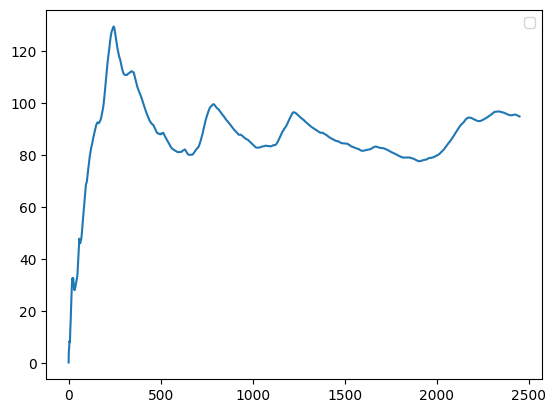

In [474]:
plt.plot(cumulative_delay)
# plt.yscale('log')
# plt.plot(variance_delay, label='kir')
# plt.yscale('log')
plt.legend()

In [475]:
# # plt.plot(cumulative_delay)
# plt.plot(dict_simulation[(0.9, 'hyperexponential')]['cumulative_delay'])
# # plt.plot(variance_delay, label='kir')
# # plt.yscale('log')
# plt.legend()

In [476]:
# for key in dict_simulation.keys():
#     print(dict_simulation[key]['k'])

In [ ]:
# import pandas as pd

# df = pd.DataFrame.from_dict(dict_simulation)
# df

In [ ]:
# cumulative_delay